In [1]:
# Use Collab T4 GPU runtime to run the model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
df = pd.read_pickle('/content/drive/MyDrive/parsed_pdf.h5')

In [4]:
reviews_df = pd.read_pickle('/content/drive/MyDrive/reviews_pdf.h5')

In [5]:
merged_df = df.merge(reviews_df, left_on=['title', 'abstractText', 'accepted'], right_on=['title', 'abstractText', 'accepted'], how='outer')
merged_df.describe()

,name,abstractText,authors,creator,emails,referenceMentions,references,title,year,Introduction,Related Work,Experiments,Results,Conclusion,Discussion,accepted,id,reviews
count,16359,27302,16359,12749,16359,16359,16359,26125,16359,11878,3888,4771,1502,5283,1777,15503,11098,11098
unique,15210,27027,14476,324,12418,235,157,25599,24,11804,3733,3922,1281,5247,1729,2,11063,506
top,7fea637fd6d02b8f0adf6f7dc36aed93-Paper.pdf,present transition based parser jointly produc...,[],LaTeX with hyperref package,[],0,0,RECURRENT NEURAL NETWORKS,2017,,,,,,,False,66,[]
freq,4,4,765,8345,2953,1531,782,7,4254,73,150,827,216,4,45,8188,4,10593


In [6]:
# df = merged_df[merged_df['accepted'].notna()]
# df.describe()
final_df = merged_df[merged_df['accepted'].notna()]
final_df = final_df[final_df['abstractText'].notna()]
final_df = final_df[final_df['title'].notna()]
del final_df['name']
del final_df['authors']
del final_df['creator']
del final_df['emails']
del final_df['referenceMentions']
del final_df['references']
final_df.describe()

,abstractText,title,year,Introduction,Related Work,Experiments,Results,Conclusion,Discussion,accepted,id,reviews
count,15487,15487,4545,4388,1434,2093,371,2064,659,15487,10942,10942
unique,15433,15365,7,4359,1385,1798,304,2064,650,2,10942,350
top,appear theory practice logic programming tplp,lie access neural turing machine,2020,,,,,"In this paper, we propose two over-smoothing m...",,False,737,[]
freq,2,3,1472,30,50,295,67,1,10,8188,1,10593


In [7]:
final_df["accepted"] = final_df["accepted"].astype(int)
final_df['accepted'].value_counts()

0    8188
1    7299
Name: accepted, dtype: int64

In [8]:
final_df.isnull().sum(axis = 0)

abstractText         0
title                0
year             10942
 Introduction    11099
 Related Work    14053
 Experiments     13394
 Results         15116
 Conclusion      13423
 Discussion      14828
accepted             0
id                4545
reviews           4545
dtype: int64

In [9]:
final_df.notna().sum(axis = 0)

abstractText     15487
title            15487
year              4545
 Introduction     4388
 Related Work     1434
 Experiments      2093
 Results           371
 Conclusion       2064
 Discussion        659
accepted         15487
id               10942
reviews          10942
dtype: int64

In [10]:
final_df.head()

,abstractText,title,year,Introduction,Related Work,Experiments,Results,Conclusion,Discussion,accepted,id,reviews
0,"In self-supervised learning, a system is taske...",Self-Supervised Relational Reasoning for Repre...,0,Learning useful representations from unlabeled...,NaN,Evaluating self-supervised methods is problema...,NaN,NaN,NaN,1,NaN,NaN
1,"Graph neural networks (GNNs), which learn the ...",Towards Deeper Graph Neural Networks with Diff...,2020,"Graph neural networks (GNNs) [1, 2, 3] have em...",NaN,We now empirically evaluate the effectiveness ...,NaN,"In this paper, we propose two over-smoothing m...",NaN,1,NaN,NaN
2,Despite the recent success of Bayesian optimiz...,High-Dimensional Bayesian Optimization via Nes...,2020,Bayesian optimization (BO) is considered as a ...,NaN,"In this section, we evaluate the proposed HD-G...",NaN,"In this paper, we proposed HD-GaBO, a high-dim...",NaN,1,NaN,NaN
3,Exploration is a key problem in reinforcement ...,Effective Diversity in Population Based Reinfo...,2021,Reinforcement Learning (RL) considers the prob...,"Neuroevolution methods [56], seek to maximize ...",Here evaluate DvD-ES and DvD-TD3 in a variety ...,NaN,NaN,NaN,1,NaN,NaN
4,One paradigm for learning from few labeled exa...,Big Self-Supervised Models are Strong Semi-Sup...,2020,Learning from just a few labeled examples whil...,NaN,NaN,NaN,NaN,"In this work, we present a simple framework fo...",1,NaN,NaN


In [11]:
final_df.drop(final_df.columns.difference(['abstractText','accepted']), 1, inplace=True)
final_df.head()

<ipython-input-11-e3511092354d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  final_df.drop(final_df.columns.difference(['abstractText','accepted']), 1, inplace=True)


,abstractText,accepted
0,"In self-supervised learning, a system is taske...",1
1,"Graph neural networks (GNNs), which learn the ...",1
2,Despite the recent success of Bayesian optimiz...,1
3,Exploration is a key problem in reinforcement ...,1
4,One paradigm for learning from few labeled exa...,1


## Hugging Face Text classification

In [12]:
!pip install transformers evaluate datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.4 MB/s eta 0:00:00


In [13]:
from transformers import AutoTokenizer
from datasets import Dataset
import evaluate
from transformers import DataCollatorWithPadding
from transformers import create_optimizer
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification

In [14]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

reference to split dataset into training and test data - https://discuss.huggingface.co/t/how-to-split-hugging-face-dataset-to-train-and-test/20885/5

In [15]:
def preprocess_function(data):
  return tokenizer(data["text"], truncation=True)

# column we want to stratify with respect to
stratify_column_name = "accepted"

# create class label column and stratify
papers_dataset = (Dataset.from_pandas(final_df, preserve_index=False)
                         .class_encode_column(stratify_column_name)
                         .train_test_split(test_size=0.33,
                                           stratify_by_column=stratify_column_name))
papers_dataset = papers_dataset.rename_columns({"abstractText": "text", "accepted": "label"})
tokenized_data = papers_dataset.map(preprocess_function, batched=True)
tokenized_data

Stringifying the column:   0%|          | 0/15487 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/15487 [00:00<?, ? examples/s]

Map:   0%|          | 0/10376 [00:00<?, ? examples/s]

Map:   0%|          | 0/5111 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10376
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 5111
    })
})

In [16]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [17]:
accuracy = evaluate.load("accuracy")

In [18]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [19]:
id2label = {0: "REJECT", 1: "ACCEPT"}
label2id = {"REJECT": 0, "ACCEPT": 1}

In [20]:
batch_size = 16
num_epochs = 5
batches_per_epoch = len(tokenized_data["train"]) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [21]:
model = TFAutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [22]:
tf_train_set = model.prepare_tf_dataset(
    tokenized_data["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = model.prepare_tf_dataset(
    tokenized_data["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [23]:
model.compile(optimizer=optimizer)  # No loss argument needed!

In [24]:
from transformers.keras_callbacks import KerasMetricCallback

metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset=tf_validation_set)

In [25]:
callbacks = [metric_callback]
model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=3, callbacks=callbacks)

Epoch 1/3
648/648 [==============================] - 533s 781ms/step - loss: 0.3579 - val_loss: 0.3035 - accuracy: 0.8501
Epoch 2/3
648/648 [==============================] - 473s 730ms/step - loss: 0.2858 - val_loss: 0.2954 - accuracy: 0.8538
Epoch 3/3
648/648 [==============================] - 499s 770ms/step - loss: 0.2457 - val_loss: 0.3241 - accuracy: 0.8599


In [26]:
# save pretrained model
# model.save_pretrained("/content/drive/MyDrive/tf_auto_model_for_sequence_classification")

In [27]:
# load pretrained model
my_model = TFAutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/tf_auto_model_for_sequence_classification", local_files_only=True)


All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/tf_auto_model_for_sequence_classification.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:
# save pretrained tokenizer
# tokenizer.save_pretrained("/content/drive/MyDrive/tf_auto_model_for_sequence_classification_tokenizer")

In [28]:
# load pretrained tokenizer
my_tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/tf_auto_model_for_sequence_classification_tokenizer")

# Inference


In [29]:
text = papers_dataset["test"][0]["text"]
text

'entity image provide significant visual information help construction knowledge representation conventional method learn knowledge representation solely structured triple ignoring rich visual information extracted entity image paper propose novel image embodied knowledge representation learning model knowledge representation learned triple image specifically image entity construct image based representation via neural image encoder representation respect multiple image instance integrated via attention based method evaluate model knowledge graph completion triple classification experimental result demonstrate model outperform baseline task indicates significance visual information knowledge representation capability model learning knowledge representation image'

In [30]:
inputs = my_tokenizer(text, return_tensors="tf")
inputs

{'input_ids': <tf.Tensor: shape=(1, 92), dtype=int32, numpy=
array([[  101,  9178,  3746,  3073,  3278,  5107,  2592,  2393,  2810,
         3716,  6630,  7511,  4118,  4553,  3716,  6630,  9578, 14336,
         6420,  9217,  4138,  5107,  2592, 15901,  9178,  3746,  3259,
        16599,  3117,  3746, 25405,  3716,  6630,  4083,  2944,  3716,
         6630,  4342,  6420,  3746,  4919,  3746,  9178,  9570,  3746,
         2241,  6630,  3081, 15756,  3746,  4372, 16044,  2099,  6630,
         4847,  3674,  3746,  6013,  6377,  3081,  3086,  2241,  4118,
        16157,  2944,  3716, 10629,  6503,  6420,  5579,  6388,  2765,
        10580,  2944,  2041,  4842, 14192, 26163,  4708,  7127,  7784,
         5107,  2592,  3716,  6630, 10673,  2944,  4083,  3716,  6630,
         3746,   102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 92), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [31]:
logits = my_model(**inputs).logits
logits

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.08328472, -0.05846464]], dtype=float32)>

In [32]:
predicted_class_id = int(tf.math.argmax(logits, axis=-1)[0])
my_model.config.id2label[predicted_class_id]

'REJECT'

# Use DistilBert tokenized data with SVM classifier

In [33]:
# SVM classifier requires input training and test data shape to be consistent.
# Therefore, truncating and padding all text data to max_length (by default 512).
def new_preprocess_function(data):
  return tokenizer(data["text"], padding="max_length", truncation=True, return_tensors="np")

new_tokenized_data = papers_dataset.map(new_preprocess_function, batched=True)
new_tokenized_data

Map:   0%|          | 0/10376 [00:00<?, ? examples/s]

Map:   0%|          | 0/5111 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10376
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 5111
    })
})

In [34]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(new_tokenized_data["train"]["input_ids"], new_tokenized_data["train"]["label"])

SVC(kernel='poly')

In [35]:
from sklearn.metrics import accuracy_score

classifier_predictions = svclassifier.predict(new_tokenized_data["test"]["input_ids"])
print("Test accuracy: ", accuracy_score(new_tokenized_data["test"]["label"], classifier_predictions)*100)

Test accuracy:  70.72979847387987


In [42]:
trained_classifier_predictions = svclassifier.predict(new_tokenized_data["train"]["input_ids"])
print("Training accuracy: ", accuracy_score(new_tokenized_data["train"]["label"], trained_classifier_predictions)*100)

Training accuracy:  84.06900539707016


[[2447  255]
 [1241 1168]]


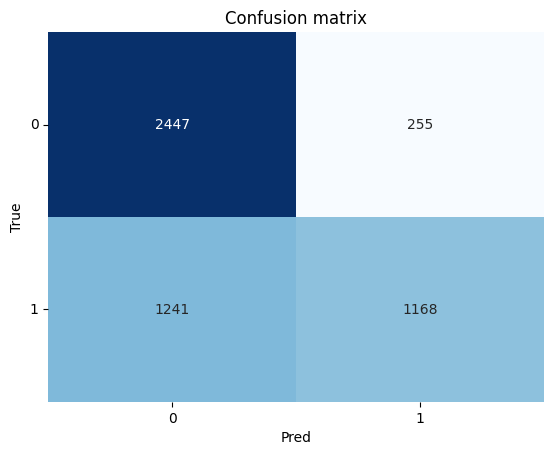

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Plot confusion matrix
cm = confusion_matrix(new_tokenized_data["test"]["label"], classifier_predictions)
print(cm)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
classes = np.unique(new_tokenized_data["test"]["label"])
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes,
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

plt.show()